# **Bioinformatics Project - Computational Drug Discovery [Part 4] Regression Models with Random Forest**

**Part 4**, we will be building a regression model of acetylcholinesterase inhibitors using the random forest algorithm.

---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **1. Import libraries**

In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [13]:
# ! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

In [14]:
# df2 = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
# df2.shape

In [17]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CDDWorking/data2/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df.shape

(5905, 882)

## **3. Input features**
The ***Acetylcholinesterase*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [18]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5900,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5901,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5902,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5903,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [19]:
Y = df.pIC50
Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
5900    6.735182
5901    7.872895
5902    7.716699
5903    8.377786
5904    8.000000
Name: pIC50, Length: 5905, dtype: float64

### **3.3. Let's examine the data dimension**

(5905, 881)

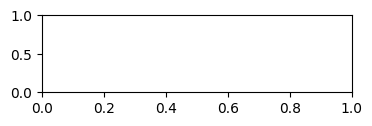

In [20]:
X.shape

In [21]:
Y.shape

(5905,)

### **3.4. Remove low variance features**

In [22]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [23]:
X.shape

(5905, 142)

## **4. Data split (80/20 ratio)**

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [25]:
X_train.shape, Y_train.shape

((4724, 142), (4724,))

In [26]:
X_test.shape, Y_test.shape

((1181, 142), (1181,))

In [34]:
# Check for infinite or extremely large values in Y_train
invalid_values_train = np.isinf(Y_train) | np.isnan(Y_train) | (np.abs(Y_train) > np.finfo(np.float64).max)
# Check for infinite or extremely large values in Y_test
invalid_values_test = np.isinf(Y_test) | np.isnan(Y_test) | (np.abs(Y_test) > np.finfo(np.float64).max)


In [35]:
# Remove the invalid values from X_train and Y_train
X_train_clean = X_train[~invalid_values_train]
Y_train_clean = Y_train[~invalid_values_train]


In [36]:
# Remove the invalid values from X_test and Y_test
X_test_clean = X_test[~invalid_values_test]
Y_test_clean = Y_test[~invalid_values_test]

## **5. Building a Regression Model using Random Forest**

In [37]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train_clean, Y_train_clean)
r2 = model.score(X_test_clean, Y_test_clean)

# model = RandomForestRegressor(n_estimators=100)
# model.fit(X_train, Y_train)
# r2 = model.score(X_test, Y_test)
# r2

In [41]:

r2

0.5555989389058932

In [39]:
Y_pred = model.predict(X_test)
Y_pred

array([6.18367402, 5.77682084, 5.13369335, ..., 6.27425867, 4.98245639,
       6.52901185])

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

In [44]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.set(color_codes=True)
# sns.set_style("white")

# ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
# ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
# ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
# ax.set_xlim(0, 12)
# ax.set_ylim(0, 12)
# ax.figure.set_size_inches(5, 5)
# plt.show

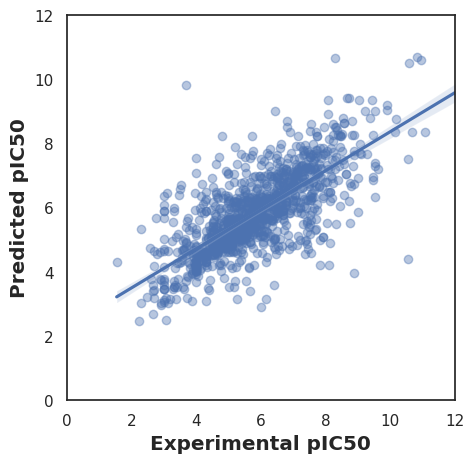

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()
